# 深度学习：基于keras的mnist手写数字识别

在深度学习方面，Keras提供了这样一个能够非常方便地搭建神经网络的工具，而且很容易快速上手。mnist手写数字识别是神经网络入门后的一个非常容易上手做的一个程序，尤其是在使用了深度学习框架后，不论是DNN还是CNN，都很简单。这篇文章里，我将介绍一下，使用keras实现mnist手写数字识别的程序。通过这篇文章，你应该就能够学会如何通过keras搭建自己的神经网络了。

整个程序的代码思路来源于GitHub 上别人的一个小项目：

https://gist.github.com/alexcpn/0683bb940cae510cf84d5976c1652abd

首先我们需要导入一些python库

## 1.numpy

这是python中用于数值计算的库，很多用python做数学建模的应该都不会没有听说过这个库，可以进行矩阵运算以及高维的数组运算，用它来做，比用n个for循环的效率不知道高到哪里去了。

然后我们需要设置一下随机数种子

In [1]:
import numpy as np
np.random.seed(123)

## 2.keras

In [2]:
# 从keras模型里面导入序贯模型
from keras.models import Sequential
# 从keras封装好的层里面导入dense全连接层、Dropout正则化层、Activation激活层和Flatten扁平化层
from keras.layers import Dense, Dropout, Activation, Flatten
# 从keras封装好的层里面导入二维卷积层和二维最大池化层
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.examples.tutorials.mnist import input_data

d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


每一行代码的用途我已经写在了注释里面，其中np_utils在后面会用它将不同类别的标签稀疏正交化

## 3.导入数据

我们可以看到，原作者是通过keras内置的数据集来训练的，但是因为那个数据集存放在亚马逊云服务器上，在中国大陆我们没办法下载下来，会提示下载失败。本文使用tensorflow载入数据。

In [19]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x_train, y_train = mnist.train.next_batch(1000)
x_test, y_test = mnist.test.next_batch(50)
x_train = x_train.reshape(1000,28,28)
x_test = x_test.reshape(50,28,28)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


我们可以查看一下数据的格式，输入输出维度

In [20]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1000, 28, 28) (1000, 10) (50, 28, 28) (50, 10)


## 4.数据可视化

有时候，为了方便，或者更直观，我们往往需要将数据可视化。对于图像数据来说，可视化就是家常便饭了，而且也是最容易可视化的一类数据之一。这里我们需要用到一个强大的绘图库matplotlib，同样，做过数学建模以及仿真的应该都用过这类库，尤其是用过matlab的话。

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


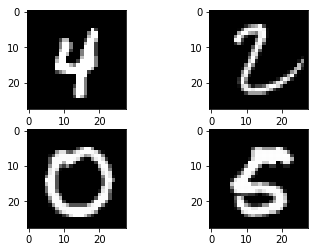

In [21]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
print(y_train[155],y_train[1],y_train[2],y_train[3])
plt.imshow(x_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()